# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hedwig Adityas
- **Email:** hedwigadityas@gmail.com
- **ID Dicoding:** ha4you

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi harian peminjam sepeda terdaftar dan tidak terdaftar pada bulan Oktober 2011?
- Berapa jumlah pengguna sepeda yang merupakan pelanggan terdaftar dan tidak terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada langkah ini, dataset day.csv dan hour.csv akan dikonversi menjadi DataFrame menggunakan Library Pandas.

* Dataset Day

In [2]:
day_df = pd.read_csv("day.csv")

print("Contoh Data dari day.csv:")
print(day_df.head())

Contoh Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


* Dataset Hour

In [3]:
hour_df = pd.read_csv("hour.csv")

print("\nContoh Data dari hour.csv:")
print(hour_df.head())


Contoh Data dari hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

Di tahap ini, kedua DataFrame akan dievaluasi untuk memastikan kesiapan dataset sebelum analisis dilakukan.

* DataFrame Day

In [4]:
print("Info dataframe day_df:")
day_df.info()

Info dataframe day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
missing_day_value = day_df.isna().sum()
print("Jumlah nilai yang hilang di day_df:\n", missing_day_value)

Jumlah nilai yang hilang di day_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataframe ini tidak mengandung nilai Null maupun data duplikat. Namun, pada kolom 'dteday', terdapat kesalahan pada tipe data yang seharusnya berupa 'date' tetapi tercatat sebagai 'object'.

* DataFrame Hour

In [8]:
print("Info dataframe hour_df:")
hour_df.info()

Info dataframe hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
missing_hour_value = hour_df.isna().sum()
print("Jumlah nilai yang hilang di hour_df:\n", missing_hour_value)

Jumlah nilai yang hilang di hour_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print("Jumlah data duplikat: ", hour_df.duplicated().sum())

Jumlah data duplikat:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataframe ini tidak mengandung nilai Null maupun data duplikat. Namun, pada kolom 'dteday', terdapat kesalahan pada tipe data yang seharusnya berupa 'date' tetapi tercatat sebagai 'object'.

### Cleaning Data

Di tahap ini, tipe data pada kolom 'dteday' dalam kedua dataframe akan diubah menjadi tipe data 'datetime'.

* DataFrame Day

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
print("Info dataframe day_df:")
day_df.info()

Info dataframe day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: 

* DataFrame Hour

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
print("Info dataframe hour_df:")
hour_df.info()

Info dataframe hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16

## Exploratory Data Analysis (EDA)

### Explore Data

Pada tahap ini, data yang telah melalui proses pembersihan akan dieksplorasi lebih lanjut untuk mendapatkan pemahaman yang lebih mendalam.

In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Data peminjaman sepeda dari 2011 hingga 2012 menunjukkan jumlah peminjam harian bervariasi dari 22 hingga 8714 orang, dengan rata-rata 4504 dan standar deviasi 1937; mayoritas peminjam adalah pengguna terdaftar, sementara faktor-faktor seperti temperatur (rata-rata 0.495), kelembaban (0.628), kondisi cuaca (1.395), kecepatan angin (0.190), dan persentase hari kerja (68%) turut memengaruhi pola peminjaman.

<Figure size 1500x1000 with 0 Axes>

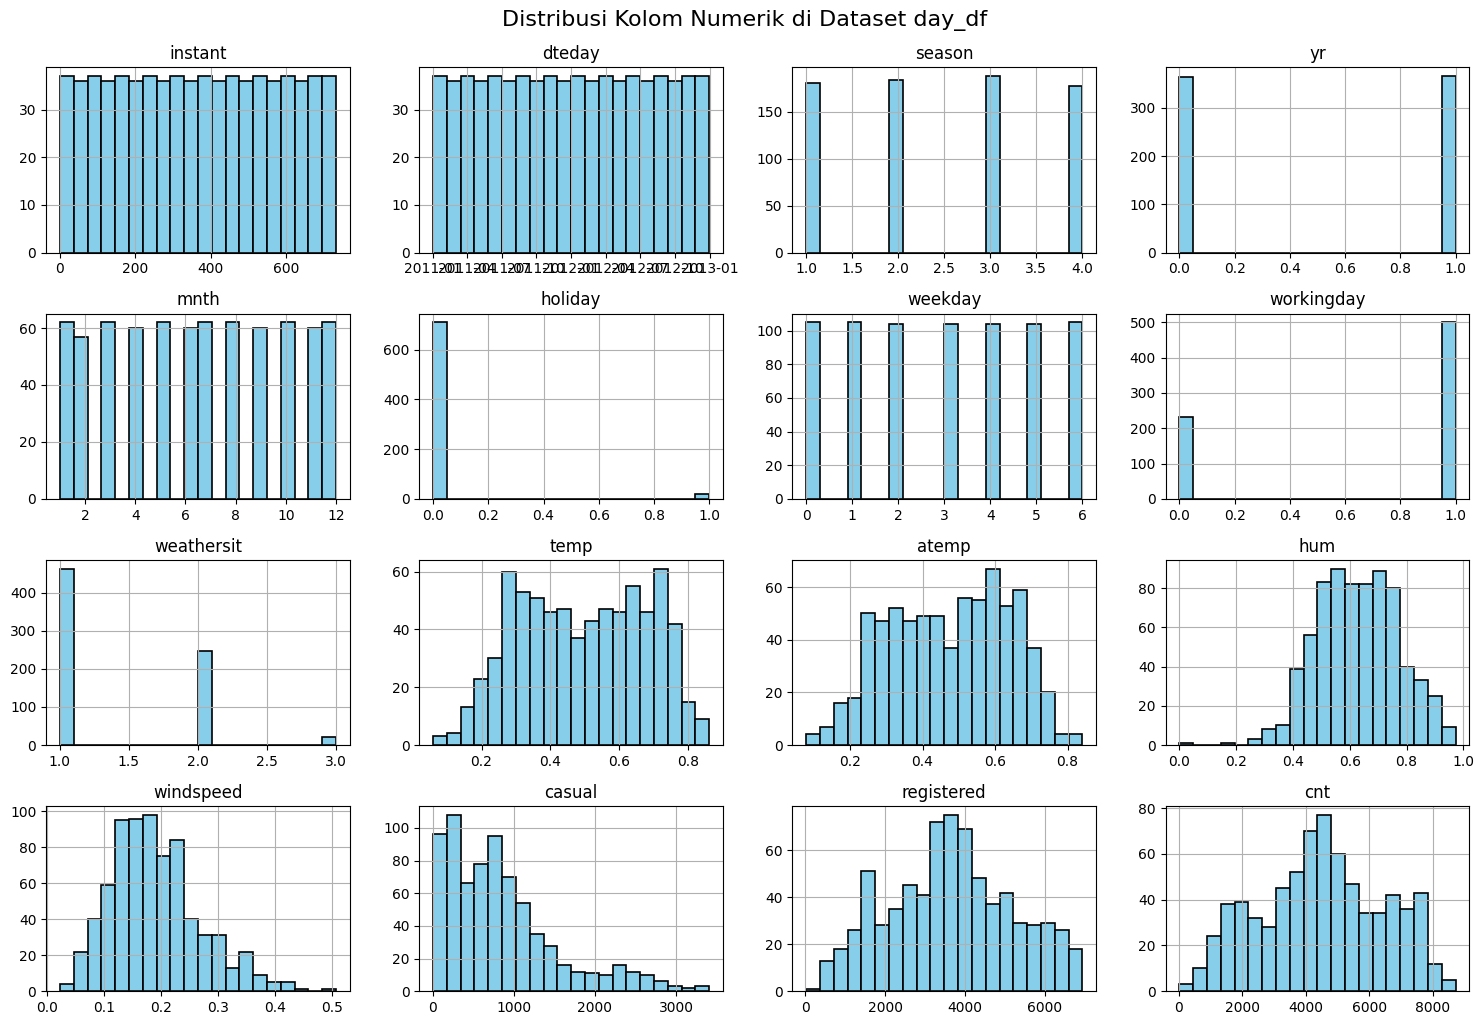

In [17]:
plt.figure(figsize=(15, 10))
day_df.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.2, figsize=(15, 10))

plt.tight_layout()
plt.suptitle("Distribusi Kolom Numerik di Dataset day_df", fontsize=16, y=1.02)
plt.show()

Gambar di atas menunjukkan distribusi data numerik pada dataset day_df, di mana peminjaman sepeda tersebar merata sepanjang tahun dan hari dalam seminggu, dengan pengaruh cuaca sedang, hari kerja, dan temperatur menengah yang mendukung jumlah peminjaman yang stabil, sementara perbedaan terlihat antara peminjam kasual dan terdaftar.

In [18]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Gambar di atas merangkum data peminjaman sepeda per jam dari 2011 hingga 2012, menunjukkan pola penggunaan yang lebih tinggi pada hari kerja, dengan peminjaman rata-rata sekitar jam 11 siang, didukung oleh kondisi cuaca baik, temperatur sedang, kelembaban sekitar 0.627, dan kecepatan angin rendah, yang menunjukkan bahwa peminjaman dipengaruhi oleh waktu dan faktor cuaca.

In [19]:
# Mengelompokkan data berdasarkan kolom 'season' dan menghitung statistik untuk kolom 'dteday' dan 'cnt'
seasonal_stats = hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()

# Mengganti nama kolom untuk keterbacaan
seasonal_stats.columns = ["Season", "Unique Days", "Max Rentals", "Min Rentals", "Average Rentals", "Std Dev Rentals"]

print("Statistik Peminjaman Berdasarkan Musim:")
print(seasonal_stats)

Statistik Peminjaman Berdasarkan Musim:
   Season  Unique Days  Max Rentals  Min Rentals  Average Rentals  \
0       1          181          801            1       111.114569   
1       2          184          957            1       208.344069   
2       3          188          977            1       236.016237   
3       4          178          967            1       198.868856   

   Std Dev Rentals  
0       119.224010  
1       188.362473  
2       197.711630  
3       182.967972  


Analisis statistik peminjaman sepeda berdasarkan musim menunjukkan bahwa rata-rata peminjaman tertinggi dan variasi terbesar terjadi pada musim ketiga dengan rata-rata 236 peminjaman per hari dan standar deviasi tertinggi, sementara jumlah hari unik tercatat konsisten di 181 hari per musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi harian peminjam sepeda terdaftar dan tidak terdaftar pada bulan Oktober 2011?

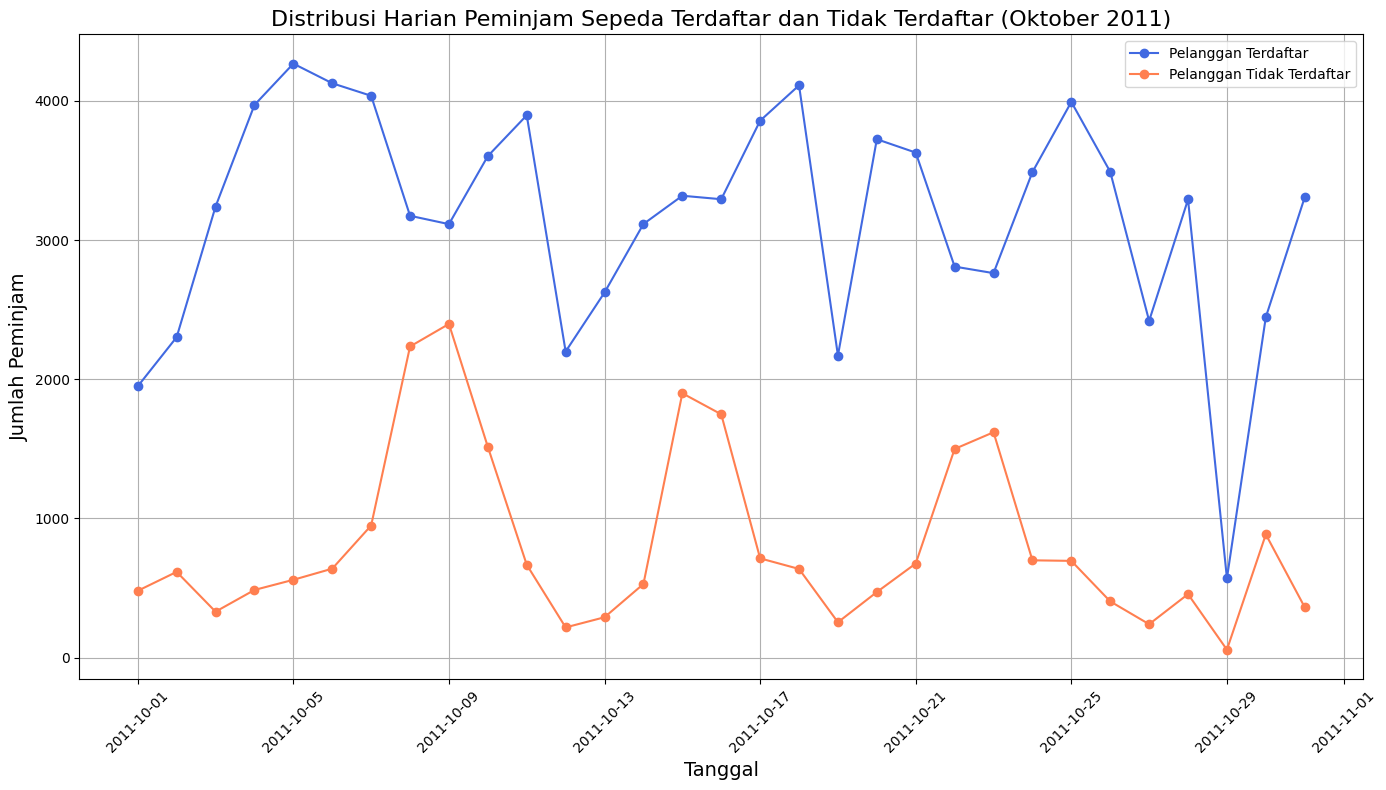

In [20]:
# Memastikan data untuk bulan Oktober 2011
october_2011_data = day_df[(day_df['dteday'] >= '2011-10-01') & (day_df['dteday'] <= '2011-10-31')]

# Membuat plot untuk peminjam terdaftar dan tidak terdaftar
plt.figure(figsize=(14, 8))
plt.plot(october_2011_data['dteday'], october_2011_data['registered'], marker='o', label='Pelanggan Terdaftar', color='royalblue')
plt.plot(october_2011_data['dteday'], october_2011_data['casual'], marker='o', label='Pelanggan Tidak Terdaftar', color='coral')

# Menambahkan judul dan label
plt.title('Distribusi Harian Peminjam Sepeda Terdaftar dan Tidak Terdaftar (Oktober 2011)', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Peminjam', fontsize=14)

# Menampilkan legenda
plt.legend(loc='upper right')

# Mengatur rotasi sumbu x untuk keterbacaan
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()


Visualisasi ini menunjukkan bahwa jumlah peminjaman sepeda harian oleh pelanggan terdaftar secara konsisten lebih tinggi dan lebih stabil dibandingkan dengan pelanggan tidak terdaftar, yang memiliki fluktuasi lebih tajam dan jumlah peminjaman yang lebih rendah.

### Pertanyaan 2: Berapa jumlah pengguna sepeda yang merupakan pelanggan terdaftar dan tidak terdaftar?

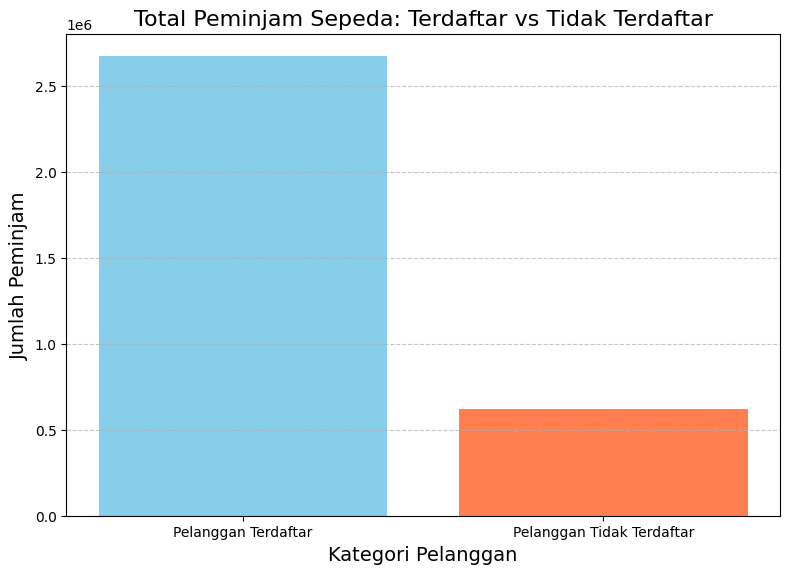

In [21]:
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

# Data untuk diagram batang
labels = ['Pelanggan Terdaftar', 'Pelanggan Tidak Terdaftar']
sizes = [total_registered, total_casual]
colors = ['skyblue', 'coral']

# Visualisasi: Diagram Batang
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Total Peminjam Sepeda: Terdaftar vs Tidak Terdaftar', fontsize=16)
plt.xlabel('Kategori Pelanggan', fontsize=14)
plt.ylabel('Jumlah Peminjam', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa total peminjaman sepeda oleh pelanggan terdaftar jauh lebih tinggi dibandingkan dengan pelanggan tidak terdaftar, dengan selisih yang signifikan di atas 1,5 juta peminjaman.

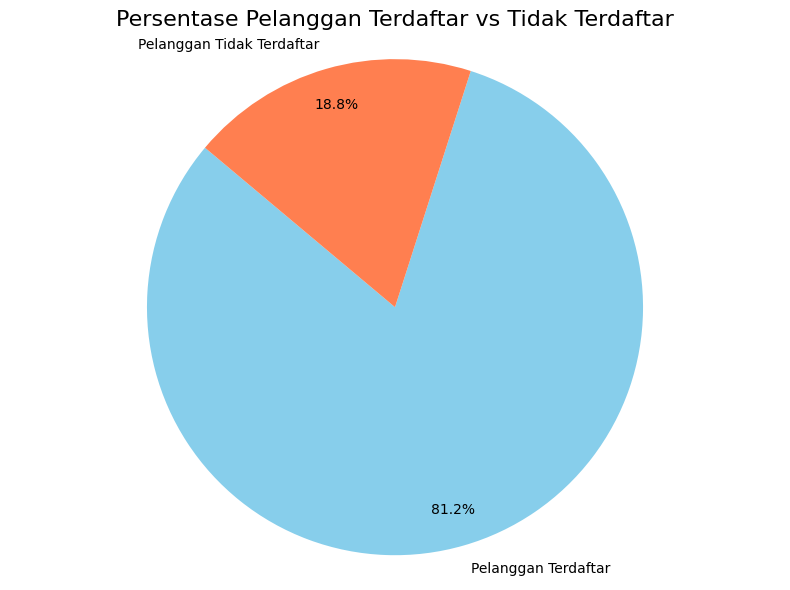

In [22]:
# Visualisasi: Diagram Lingkaran
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')  # Agar lingkaran menjadi bulat
plt.title('Persentase Pelanggan Terdaftar vs Tidak Terdaftar', fontsize=16)
plt.tight_layout()
plt.show()

Diagram pie di atas menunjukkan persentase peminjaman sepeda antara pelanggan terdaftar dan pelanggan tidak terdaftar, di mana 81,2% peminjaman dilakukan oleh pelanggan terdaftar dan 18,8% oleh pelanggan tidak terdaftar, menegaskan dominasi peminjaman oleh pelanggan terdaftar.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 - Bagaimana distribusi harian peminjam sepeda terdaftar dan tidak terdaftar pada bulan Oktober 2011?

A. Pada bulan Oktober 2011, pelanggan terdaftar memiliki jumlah peminjaman sepeda harian yang konsisten tinggi.

B. Peminjaman harian oleh pelanggan terdaftar berkisar antara 2000 hingga lebih dari 4000 peminjaman.

C. Pelanggan tidak terdaftar menunjukkan jumlah peminjaman yang lebih rendah, dengan puncak sekitar 1500 peminjaman pada beberapa hari.

D. Sebagian besar hari untuk pelanggan tidak terdaftar memiliki peminjaman di bawah 1000.

E. Distribusi ini menunjukkan bahwa pelanggan terdaftar lebih konsisten memanfaatkan layanan peminjaman sepeda dibandingkan dengan pelanggan tidak terdaftar.

F. Pelanggan tidak terdaftar menunjukkan variasi yang lebih besar dan jumlah peminjaman yang lebih rendah sepanjang bulan tersebut.



- Conclution pertanyaan 2 - Berapa jumlah pengguna sepeda yang merupakan pelanggan terdaftar dan tidak terdaftar?

A. Total peminjaman sepeda didominasi oleh pelanggan terdaftar.

B. Pelanggan terdaftar menyumbang sekitar 81,2% dari keseluruhan peminjaman.

C. Pelanggan tidak terdaftar hanya berkontribusi sekitar 18,8%.

D. Mayoritas pengguna sepeda adalah pelanggan terdaftar.

E. Jumlah peminjaman pelanggan terdaftar jauh lebih tinggi dibandingkan dengan pelanggan tidak terdaftar.